In [3]:
import torch
from libs.seq2seq_model import S4DModel
from libs.lfgenerator import Shift
from pytorch_lightning import Trainer
import matplotlib.pyplot as plt

In [4]:
model = S4DModel.load_from_checkpoint("runs/s4d_shift/version_2/checkpoints/s4d_shift-epoch=100-valid_loss=3.27e-08.ckpt")
generator = Shift({'input_dim':1, 'path_len':5 ,'shift':[1], 'data_num':2200})

x, y = generator.generate()
x = torch.tensor(x)
y = torch.tensor(y)
dataset = torch.utils.data.TensorDataset(x, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=256,drop_last=True)

In [5]:
trainer = Trainer(accelerator="gpu", devices=[3], precision=64)
trainer.validate(model=model, dataloaders=loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/haotian/Enviroments/env1/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       valid_loss          0.007842680159159754
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'valid_loss': 0.007842680159159754}]

In [6]:
x[0]

tensor([[-0.1048],
        [ 0.0909],
        [ 0.0239],
        [-0.0743],
        [ 0.2238]], dtype=torch.float64)

In [7]:
model(x)[0]

tensor([[-1.8369e-05],
        [-7.7021e-05],
        [-5.3466e-05],
        [-3.5861e-05],
        [-9.0467e-05]], dtype=torch.float64, grad_fn=<SelectBackward0>)

In [16]:
id = torch.zeros(1,200,1)
id[0,0,0] = 1.0

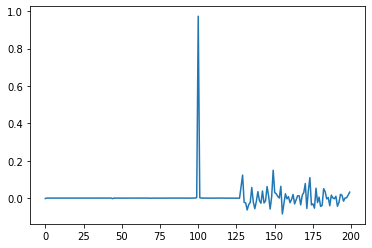

In [17]:
plt.plot(model(id)[0,:,0].detach().cpu().numpy())